# 1. Import Data

In [1]:
import numpy as np
import pickle
import sklearn
import tensorflow as tf
from tqdm import tqdm

In [2]:
y_name={
    "y_train":"train_y",
    "y_test":"test_y"
}

In [3]:
def open_pkl(file_name):
    all_data=dict()
    for each_key in file_name.keys():
        name = file_name[each_key]
        pickle_file = open('DataSet\\'+name+".pkl",mode="rb")
        data = pickle.load(pickle_file)
        pickle_file.close()
        all_data[each_key]=data
    return all_data

In [4]:
y_data = open_pkl(y_name)
y_train = y_data["y_train"]
y_test = y_data["y_test"]

In [5]:
y_train

array([0, 3, 0, ..., 0, 0, 0])

In [6]:
# data with suffix "_word2vec" means this data is transformed based on pretrained word2vec lexicon.
# data with suffix "_glove" means this data is transformed based on pretrained glove lexicon.
file_name0={
    #"train0":"vec_train_a_no_cor_word2vec",# data without correction of misspell and shorthand and emoji, emoticon
    #"train1":"vec_train_a_no_emo_word2vec",# data without emoji and emoticon
    "train2":"vec_train_a_emo_word2vec",# data with emoji and emoticon
    #"train3":"vec_train_a_no_cor_glove",# data without correction of misspell and shorthand and emoji, emoticon
    #"train4":"vec_train_a_no_emo_glove",# data without emoji and emoticon
    "train5":"vec_train_a_emo_glove"# data with emoji and emoticon
    }
file_name1={
    #"test0":"vec_test_a_no_cor_word2vec",
    #"test1":"vec_test_a_no_emo_word2vec",
    "test2":"vec_test_a_emo_word2vec",
    #"test3":"vec_test_a_no_cor_glove",
    #"test4":"vec_test_a_no_emo_glove",
    "test5":"vec_test_a_emo_glove"
}

In [7]:
#import data
def open_pkl_data(file_name):
    all_data=dict()
    for each_key in file_name.keys():
        name = file_name[each_key]
        pickle_file = open('DataSet\\'+name+".pkl",mode="rb")
        data = pickle.load(pickle_file)
        pickle_file.close()
        all_data[each_key]=np.array(data)
    return all_data

In [8]:
train_data = open_pkl_data(file_name0)
test_data = open_pkl_data(file_name1)

In [9]:
train_data["train2"][:1]

array([array([[ 0.24609375,  0.02563477,  0.03881836, ..., -0.12695312,
         0.04223633, -0.16503906],
       [ 0.16992188, -0.19042969,  0.23828125, ..., -0.21777344,
         0.09765625, -0.26171875],
       [ 0.21777344,  0.07714844,  0.03833008, ..., -0.54296875,
         0.35546875, -0.0246582 ],
       ...,
       [ 0.02114868, -0.21972656,  0.515625  , ...,  0.03369141,
         0.4921875 ,  0.32080078],
       [ 0.5830078 ,  0.29882812,  0.2475586 , ..., -0.5214844 ,
        -0.47753906,  0.5390625 ],
       [ 0.4453125 ,  0.45703125,  0.20800781, ..., -0.4658203 ,
        -0.8847656 , -0.45703125]], dtype=float32)], dtype=object)

# 2.Preprocessing for padding the sentence
- because each sentence is different on length, we need to extend those shorter sentence to the same length for further analysis

In [10]:
# increase the length of each text in each row till it matches the max length of all the texts
def getlen_max(input_data):
    'function for estimating the max length of text in data'
    max_no = 0
    for text in input_data:
        num_word = len(text)
        if max_no <= num_word:
            max_no = num_word

    return max_no

In [11]:
def compare_length(input_dict1,input_dict2):
    max_no = 0
    for key in input_dict1.keys():
        comparison = getlen_max(input_dict1[key])
        if max_no < comparison:
            max_no = comparison
    for key in input_dict2.keys():
        comparison = getlen_max(input_dict2[key])
        if max_no < comparison:
            max_no = comparison
    return max_no

In [12]:
# coz it doesn't matter how long we set the sentence, so I use the max length directly regardless of from which data resource
len_max = compare_length(train_data,test_data)
print(len_max)

173


In [13]:
def extend_text(input_data, len_max,padding="pre",dimension=300):
    content=list()
    if padding == "post":
        for text in tqdm(input_data):
            add_no = len_max - len(text)
            x = np.zeros((add_no,dimension))
            new_text = np.vstack((text,x))#padding is post
            content.append(new_text)
            
    elif padding == "pre":
        for text in tqdm(input_data):
            add_no = len_max - len(text)
            x = np.zeros((add_no,dimension))
            new_text = np.vstack((x,text))#padding is pre
            content.append(new_text)

    content = np.array(content)
    return content

In [14]:
test = [[[1,2,3],[3,4,5]],[[1,2,3],[4,5,6]]]
test = np.array(test)
test = extend_text(test,len_max,dimension=3)
print(test)

100%|██████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 2007.32it/s]

[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [1. 2. 3.]
  [3. 4. 5.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [1. 2. 3.]
  [4. 5. 6.]]]


In [15]:
# because of memory error, I have to disclose the for loop of all dict. Instead padding the text of data one by one
X_train=dict()
X_test=dict()

In [16]:
key_name = "train2"
X_train[key_name] = extend_text(train_data[key_name],len_max)

100%|██████████████████████████████████████████████████████████████████████████| 30160/30160 [00:07<00:00, 4055.34it/s]


In [17]:
key_name = "train5"
X_train[key_name] = extend_text(train_data[key_name],len_max)

100%|███████████████████████████████████████████████████████████████████████████| 30160/30160 [00:49<00:00, 604.76it/s]


In [18]:
key_name = "test2"
X_test[key_name] = extend_text(test_data[key_name],len_max)

100%|████████████████████████████████████████████████████████████████████████████| 5509/5509 [00:02<00:00, 2318.98it/s]


In [19]:
key_name = "test5"
X_test[key_name] = extend_text(test_data[key_name],len_max)

100%|████████████████████████████████████████████████████████████████████████████| 5509/5509 [00:04<00:00, 1363.80it/s]


# 3. Preprocessing of y
- if we use 1 hot representation, we must change y again
- but it only depends on with loss function we apply on our model

In [20]:
# in order to plot ROC curve and calculate AUC, I need to turn y label into 1 hot representation.
# transfer y label from {class:[0,1,2,3]} into {class: [1,0,0,0], [0,1,0,0],[0,0,1,0],[0,0,0,1]}
emotion = {"others":0,"happy":1,"sad":2,"angry":3}
y_test1hot = tf.keras.utils.to_categorical(y_test,num_classes=4)

# 4.build BiLSTM Model

## 4.1. initialize the model and add layers

In [21]:
# import libraries
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional

In [22]:
# firstly we need to make sure our input share the same format
input_shape = X_train["train2"][0].shape
print(input_shape) # this means 300 length vectors with 162 timesteps

(173, 300)


In [23]:
def model_build():
    # initialize RNN model
    model = tf.keras.Sequential()
    
    # add 1st BiLSTM layer, I need to set the input_shape directly, 
    # which should be 2 dimensions, one for the timesteps, one for the indicators inside
    # because sentence can be complex, here I set the LSTM cells number as 50
    forward_layer = LSTM(units = 50, activation="tanh",dropout=0.2, recurrent_activation="sigmoid", return_sequences = True)
    #backward_layer = LSTM(units = 50, activation='relu',dropout=0.2, return_sequences=True, go_backwards=True)
    model.add(Bidirectional(layer = forward_layer,merge_mode="concat",input_shape = input_shape))
    
    
    
    # add 2nd BiLSTM layer, since it's 2nd layer, I don't need to set the input_shape anymore
    model.add(Bidirectional(layer = forward_layer))
    #model.add(Dropout(0.2))
    forward_layer2 = LSTM(units = 50, activation="tanh",dropout=0.2, recurrent_activation="sigmoid")
    # add 3rd LSTM layer
    model.add(Bidirectional(layer = forward_layer2))
    #model.add(Dropout(0.2))
    
   
    # add output layer, since the data has 4 different categories as label, I set the final neurons number as 4
    # and sicne I need the possibilities for each category, I set the final activation function as "sigmoid"
    model.add(Dense(units=4, activation='sigmoid'))
    
    return model

## 4.2. Compilation

In [24]:
lstm_model = model_build()

In [25]:
# compilation
# we use stochastic gradient descent as our optimizer, cross entropy as our loss function
# it's because I use integer category as label, so I have to use sparse_categorical_crossentropy as my loss function
lstm_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [26]:
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 173, 100)          140400    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 173, 100)          60400     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 100)               60400     
_________________________________________________________________
dense (Dense)                (None, 4)                 404       
Total params: 261,604
Trainable params: 261,604
Non-trainable params: 0
_________________________________________________________________


## 4.3. Save Model Function

In [27]:
# global parameter
modelname="BiLSTM"

In [28]:
def save_model(name,model,modelname):
    model_json=model.to_json()
    # specialize model to json
    name_path = "DataSet\\{a}_{b}".format(a=modelname,b=name)
    with open(name_path+".json","w") as json_file:
        json_file.write(model_json)
        
    # sepcialize weights to HDF5
    model.save_weights(name_path+".h5")
    print("Save model to DataSet archive successfully")

# 5.train BiLSTM Model

In [29]:
history=dict() # to store the history of the model training
epochs = 100
batch = 100
vali_split=0.1
# though validation_data is not used in propagation, the model will be gradually familier with validation data. There can be information leak.
# therefore, normally use validation_split for testing model to avoid overfitting

In [30]:
key_name="train2"
key_name2="test2"
history[key_name]=lstm_model.fit(x = X_train[key_name],y=y_train,validation_split=vali_split, epochs =epochs, batch_size=batch)
save_model(key_name,lstm_model,modelname)

Epoch 1/100
272/272 [==============================] - 750s 3s/step - loss: 0.6369 - accuracy: 0.7478 - val_loss: 0.4003 - val_accuracy: 0.8568
Epoch 2/100
272/272 [==============================] - 708s 3s/step - loss: 0.3807 - accuracy: 0.8628 - val_loss: 0.3626 - val_accuracy: 0.8667
Epoch 3/100
272/272 [==============================] - 972s 4s/step - loss: 0.3241 - accuracy: 0.8854 - val_loss: 0.3232 - val_accuracy: 0.8883
Epoch 4/100
272/272 [==============================] - 973s 4s/step - loss: 0.2906 - accuracy: 0.8967 - val_loss: 0.3316 - val_accuracy: 0.8790
Epoch 5/100
272/272 [==============================] - 871s 3s/step - loss: 0.2687 - accuracy: 0.9045 - val_loss: 0.2931 - val_accuracy: 0.8959
Epoch 6/100
272/272 [==============================] - 751s 3s/step - loss: 0.2448 - accuracy: 0.9141 - val_loss: 0.2914 - val_accuracy: 0.9009
Epoch 7/100
272/272 [==============================] - 764s 3s/step - loss: 0.2279 - accuracy: 0.9195 - val_loss: 0.3080 - val_accuracy:

272/272 [==============================] - 700s 3s/step - loss: 0.0341 - accuracy: 0.9874 - val_loss: 0.5062 - val_accuracy: 0.8912
Epoch 58/100
272/272 [==============================] - 722s 3s/step - loss: 0.0321 - accuracy: 0.9882 - val_loss: 0.5185 - val_accuracy: 0.9005
Epoch 59/100
272/272 [==============================] - 770s 3s/step - loss: 0.0316 - accuracy: 0.9885 - val_loss: 0.5115 - val_accuracy: 0.8969
Epoch 60/100
272/272 [==============================] - 760s 3s/step - loss: 0.0326 - accuracy: 0.9885 - val_loss: 0.5161 - val_accuracy: 0.8992
Epoch 61/100
272/272 [==============================] - 766s 3s/step - loss: 0.0290 - accuracy: 0.9894 - val_loss: 0.5345 - val_accuracy: 0.8942
Epoch 62/100
272/272 [==============================] - 734s 3s/step - loss: 0.0311 - accuracy: 0.9888 - val_loss: 0.5452 - val_accuracy: 0.8972
Epoch 63/100
272/272 [==============================] - 738s 3s/step - loss: 0.0305 - accuracy: 0.9888 - val_loss: 0.5318 - val_accuracy: 0.894

In [31]:
key_name="train5"
key_name2="test5"
history[key_name]=lstm_model.fit(x = X_train[key_name],y=y_train,validation_split=vali_split, epochs =epochs, batch_size=batch)
save_model(key_name,lstm_model,modelname)

Epoch 1/100
272/272 [==============================] - 787s 3s/step - loss: 0.7631 - accuracy: 0.7135 - val_loss: 0.4771 - val_accuracy: 0.8203
Epoch 2/100
272/272 [==============================] - 802s 3s/step - loss: 0.4123 - accuracy: 0.8513 - val_loss: 0.3640 - val_accuracy: 0.8710
Epoch 3/100
272/272 [==============================] - 812s 3s/step - loss: 0.3459 - accuracy: 0.8746 - val_loss: 0.3139 - val_accuracy: 0.8896
Epoch 4/100
272/272 [==============================] - 796s 3s/step - loss: 0.3102 - accuracy: 0.8897 - val_loss: 0.2968 - val_accuracy: 0.8952
Epoch 5/100
272/272 [==============================] - 797s 3s/step - loss: 0.2866 - accuracy: 0.8978 - val_loss: 0.2916 - val_accuracy: 0.8975
Epoch 6/100
272/272 [==============================] - 786s 3s/step - loss: 0.2692 - accuracy: 0.9045 - val_loss: 0.2864 - val_accuracy: 0.9005
Epoch 7/100
272/272 [==============================] - 785s 3s/step - loss: 0.2549 - accuracy: 0.9101 - val_loss: 0.2754 - val_accuracy:

272/272 [==============================] - 726s 3s/step - loss: 0.0571 - accuracy: 0.9780 - val_loss: 0.4093 - val_accuracy: 0.9058
Epoch 58/100
272/272 [==============================] - 733s 3s/step - loss: 0.0570 - accuracy: 0.9793 - val_loss: 0.4037 - val_accuracy: 0.9092
Epoch 59/100
272/272 [==============================] - 731s 3s/step - loss: 0.0544 - accuracy: 0.9801 - val_loss: 0.4279 - val_accuracy: 0.9101
Epoch 60/100
272/272 [==============================] - 725s 3s/step - loss: 0.0543 - accuracy: 0.9807 - val_loss: 0.4255 - val_accuracy: 0.9072
Epoch 61/100
272/272 [==============================] - 733s 3s/step - loss: 0.0541 - accuracy: 0.9808 - val_loss: 0.4110 - val_accuracy: 0.9092
Epoch 62/100
272/272 [==============================] - 725s 3s/step - loss: 0.0545 - accuracy: 0.9788 - val_loss: 0.3988 - val_accuracy: 0.9058
Epoch 63/100
272/272 [==============================] - 739s 3s/step - loss: 0.0513 - accuracy: 0.9807 - val_loss: 0.4260 - val_accuracy: 0.903

# 6.Load Models

In [32]:
model_names = {
    #"train0":"train0",
    #"train1":"train1",
    "train2":"train2",
    #"train3":"train3",
    #"train4":"train4",
    "train5":"train5",
}

In [33]:
def load_model(names,modelname):
    models = dict()
    for key in names.keys():
        # load json file
        load_path = "DataSet\\{a}_{b}".format(a=modelname,b=names[key])
        json_file = open(load_path+".json",'r')
        model_json = json_file.read()
        json_file.close()
        model = tf.keras.models.model_from_json(model_json)
        # load weights and assign them to the model
        model.load_weights(load_path+".h5")
        print("loaded {a} model successfully".format(a=names[key]))
        models[key]=model
    
    return models

In [34]:
models_dict = load_model(model_names,modelname)

loaded train2 model successfully
loaded train5 model successfully


# 7.Prediction

In [35]:
# function for getting prediction
def get_prediction(classifiers, test_dict):
    y_pred_dict= dict()
    list1 = list(classifiers.keys())
    list2 = list(test_dict.keys())
    length = len(list1)
    
    for i in tqdm(range(length)):
        y_pred_dict[list2[i]]=classifiers[list1[i]].predict(test_dict[list2[i]])
        
    return y_pred_dict

In [36]:
y_scores = get_prediction(models_dict,X_test)

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [01:11<00:00, 35.78s/it]


In [37]:
# to process the possibilities into category
def get_result(y_score):
    y_result=list()
    for each_pred in y_score:
        max_no=0
        pos =0
        for i in range(4):
            if max_no < each_pred[i]:
                max_no = each_pred[i]
                pos = i
        y_result.append(pos)
    
    y_result = np.array(y_result)
    return y_result

def get_result_all(y_scores):
    y_preds=dict()
    for key in y_scores.keys():
        y_preds[key]=get_result(y_scores[key])
    return y_preds

In [38]:
y_preds = get_result_all(y_scores)

In [39]:
# function for saving the predictions and scores
def save_prediction(name,data):
    pickle_file = open('Prediction\\'+name+".pkl",mode='wb')
    pickle.dump(data,pickle_file)
    pickle_file.close()

In [40]:
path_preds="{0}_preds".format(modelname)
path_scores="{0}_scores".format(modelname)
save_prediction(path_preds,y_preds)
save_prediction(path_scores,y_scores)

# 8.Evaluation

## 8.1.plot learning curve

In [41]:
import matplotlib.pyplot as plt

def plot_learningCurve(singlehistory,epochs,modelname,dataname):
    epoch_range = range(1, epochs +1)
    plt.figure()
    plt.plot(epoch_range,singlehistory.history['accuracy'],color='b',label='accuracy')
    plt.plot(epoch_range,singlehistory.history['val_accuracy'],color='r',label='validation accuracy')
    plt.xlim([0.0,epochs+1.0])
    plt.ylim([0.0,1.2])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('History of {a} Model Accuracy on data {b}'.format(a=modelname,b=dataname))
    plt.legend(loc="lower right")
    plt.savefig("Pictures\\{a}\\History of {b} Model Accuracy on data {c}.png".format(a=modelname,b=modelname,c=dataname))
    plt.show()
    
    plt.figure()
    plt.plot(epoch_range,singlehistory.history['loss'],color='b',label='loss')
    plt.plot(epoch_range,singlehistory.history['val_loss'],color='r',label='validation loss')
    plt.xlim([0.0,epochs+1.0])
    plt.ylim([0.0,1.2])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('History of {a} Model Loss on data {b}'.format(a=modelname,b=dataname))
    plt.legend(loc="upper left")
    plt.savefig("Pictures\\{a}\\History of {b} Model Loss on data {c}.png".format(a=modelname,b=modelname,c=dataname))
    plt.show()

In [42]:
def plot_learningCurve_all(history,epochs,modelname):
    for key in history.keys():
        plot_learningCurve(history[key],epochs,modelname,key)

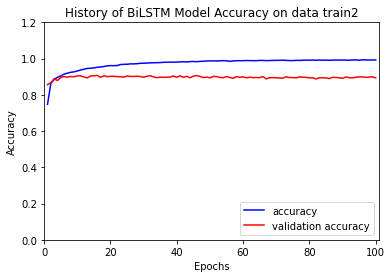

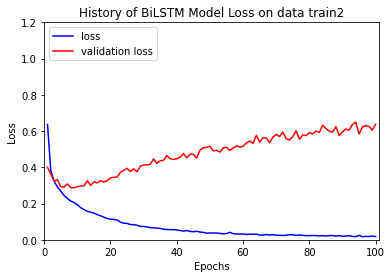

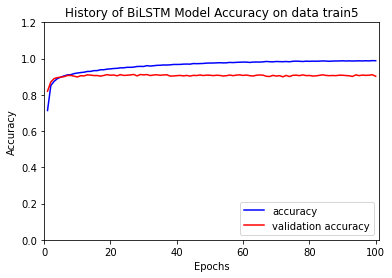

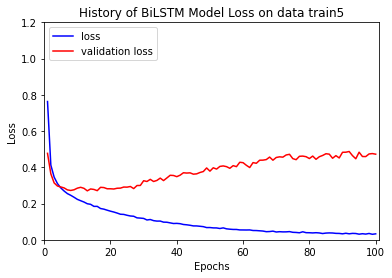

In [43]:
plot_learningCurve_all(history,epochs,modelname)

## 8.2. Evaluation: confusion matrix, accuracy, precision, recall, F1 score

In [44]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# print evaluation result
def get_evaluation(y_test,y_pred,oneX_test, model):
    ev = dict()
    ev["confusion_matrix"]=confusion_matrix(y_test,y_pred)
    ev["accuracy"] = accuracy_score(y_test,y_pred)
    ev["precision_macro"]=precision_score(y_test,y_pred,average="macro")
    ev["precision_micro"]=precision_score(y_test,y_pred,average="micro")
    ev["precision_weighted"]=precision_score(y_test,y_pred,average="weighted")
    ev["recall_macro"]=recall_score(y_test,y_pred,average="macro")
    ev["recall_micro"]=recall_score(y_test,y_pred,average="micro")
    ev["recall_weighted"]=recall_score(y_test,y_pred,average="weighted")
    ev["F1_score_macro"]=f1_score(y_test,y_pred,average="macro")
    ev["F1_score_micro"]=f1_score(y_test,y_pred,average="micro")
    ev["F1_score_weighted"]=f1_score(y_test,y_pred,average="weighted")
    
    for key in ev.keys():
        if key !="confusion_matrix":
            print("{a} is: {b}".format(a=key, b=ev[key]))
        else:
            print(ev[key])
    
    # and also the basic evaluation from keras
    model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    eval_ = model.evaluate(oneX_test,y_test)
    print("Loss: {0:.7}".format(eval_[0]))
    print("Accuracy: {0:.2%}".format(eval_[1]))
    
    return ev

In [45]:
#"macro": "Calculate metrics for each label, and find their unweighted mean. ",
#"micro": "Calculate metrics globally by counting the total true positives, false negatives and false positives."
#"weighted":"Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). "

def get_evaluation_all(y_test, y_pred_dict, X_test,models):
    list_test = list(y_pred_dict.keys())
    list_train = list(models.keys())
    length = len(list_test)
    for i in tqdm(range(length)):
        print("evaluation on data {0}".format(list_test[i]))
        get_evaluation(y_test, y_pred_dict[list_test[i]],X_test[list_test[i]],models[list_train[i]])

        print("***************************************")
        

In [46]:
get_evaluation_all(y_test,y_preds,X_test,models_dict)

  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

evaluation on data test2
[[4220  172  116  169]
 [  63  219    1    1]
 [  24    3  211   12]
 [  51    2    5  240]]
accuracy is: 0.8876384098747504
precision_macro is: 0.6809296035052611
precision_micro is: 0.8876384098747504
precision_weighted is: 0.9101191259364398
recall_macro is: 0.8306959198498451
recall_micro is: 0.8876384098747504
recall_weighted is: 0.8876384098747504
F1_score_macro is: 0.7421928752411868
F1_score_micro is: 0.8876384098747504
F1_score_weighted is: 0.8951811133585827
173/173 [==============================] - 22s 127ms/step - loss: 0.6860 - accuracy: 0.8876


 50%|██████████████████████████████████████████                                          | 1/2 [00:27<00:27, 27.29s/it]

Loss: 0.6860214
Accuracy: 88.76%
***************************************
evaluation on data test5
[[4220  144  111  202]
 [  68  212    2    2]
 [  24    1  213   12]
 [  39    0    5  254]]
accuracy is: 0.8892721001996733
precision_macro is: 0.6869148943765973
precision_micro is: 0.8892721001996733
precision_weighted is: 0.9124628038649486
recall_macro is: 0.8382789144618122
recall_micro is: 0.8892721001996733
recall_weighted is: 0.8892721001996733
F1_score_macro is: 0.7477531690392472
F1_score_micro is: 0.8892721001996733
F1_score_weighted is: 0.89683416226592
173/173 [==============================] - 20s 118ms/step - loss: 0.6036 - accuracy: 0.8893


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:52<00:00, 26.24s/it]

Loss: 0.6036102
Accuracy: 88.93%
***************************************


## 8.3. Evaluation: ROC curve, AUC

In [47]:
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
import matplotlib.pyplot as plt

In [48]:
def compute_roc_auc(y_test1hot, y_score):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_class = 4
    
    # compute roc curve and auc based on each label
    for i in range(n_class):
        fpr[i],tpr[i],_ = roc_curve(y_test1hot[:,i],y_score[:,i])
        roc_auc[i] = auc(fpr[i],tpr[i])
    
    # compute roc curve and auc based on average type = "micro"
    fpr["micro"],tpr["micro"],_=roc_curve(y_test1hot.ravel(),y_score.ravel())
    roc_auc["micro"]=auc(fpr["micro"],tpr["micro"])
    
    # compute roc curve and auc based on average type = "macro"
    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_class)]))
    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_class):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
        
    # Finally average it and compute AUC
    mean_tpr = mean_tpr/n_class
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"],tpr["macro"])
    
    return fpr, tpr, roc_auc

In [49]:
def compute_roc_auc_all(y_test1hot, y_scores):
    fprs=dict()
    tprs=dict()
    roc_aucs=dict()
    for key in tqdm(y_scores.keys()):
        fprs[key],tprs[key],roc_aucs[key]=compute_roc_auc(y_test1hot,y_scores[key])
    
    return fprs,tprs,roc_aucs

In [50]:
def plot_roc(fpr, tpr, roc_auc, dataname,modelname,choose = "all"):
    n_class=4
    
    # make variable choose as command for choosing which curve to show
    # below it's the explaination of choose
    ex_choose = {
        "all": "show all curves",
        "macro": "only show macro curve",
        "micro": "only show micro curve",
        "label": "only show curves of labels"
        }
    
    colors = ["y", "g","cornflowerblue","r"]
    label_name = ["others", "happy","sad","angry"]
    plt.figure()
    
    if (choose !="macro") and (choose !="label"):
        # draw the line of micro-average ROC curve
        plt.plot(fpr["micro"],tpr["micro"],
                 label="micro-average ROC (AUC: {0:0.2f})".format(roc_auc["micro"]),
                 color = 'deeppink',linestyle=':',lw=4)
    
    if (choose !="micro") and (choose !="label"):
        # draw the line of macro-average ROC curve
        plt.plot(fpr["macro"],tpr["macro"],
                 label="macro-average ROC (AUC: {0:0.2f})".format(roc_auc["macro"]),
                 color = 'navy',linestyle=':',lw=4)
        
    if (choose !="macro") and (choose !="micro"):    
        # draw line of each label
        for i in range(n_class):
            plt.plot(fpr[i],tpr[i],color=colors[i],lw=2,
                     label="ROC of class {0} {1} (AUC: {2:0.2f})"
                     "".format(i,label_name[i],roc_auc[i]))
    
    plt.plot([0,1],[0,1],linestyle="--",color='k',lw=2)
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve on data {0} by model {1}'.format(dataname,modelname))
    
    plt.legend(loc="lower right")
    plt.savefig("Pictures\\{a}\\SingleData\\ROC Curve by model {b}_{c} on data {d}.png".format(a=modelname,d=dataname,b=modelname,c=choose))
    plt.show()
    

In [51]:
fprs,tprs,roc_aucs=compute_roc_auc_all(y_test1hot, y_scores)

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 64.69it/s]


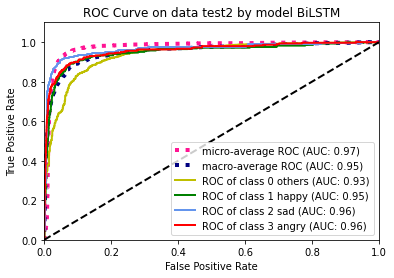

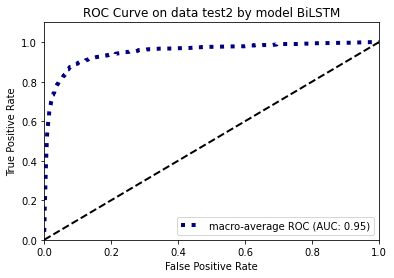

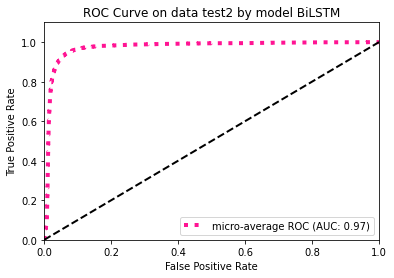

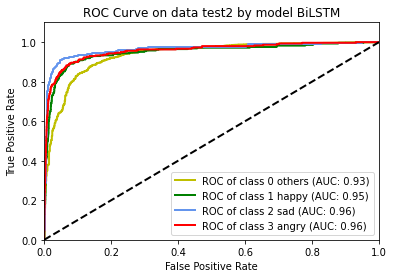

In [52]:
key_name = "test2"
fpr = fprs[key_name]
tpr = tprs[key_name]
roc_auc = roc_aucs[key_name]
dataname=key_name
plot_roc(fpr, tpr, roc_auc, dataname,modelname,choose = "all")
plot_roc(fpr, tpr, roc_auc, dataname,modelname,choose = "macro")
plot_roc(fpr, tpr, roc_auc, dataname,modelname,choose = "micro")
plot_roc(fpr, tpr, roc_auc, dataname,modelname,choose = "label")

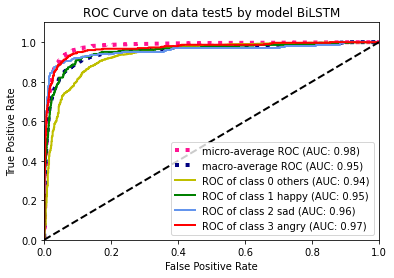

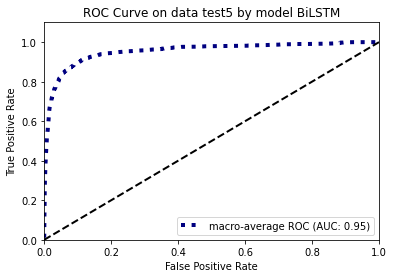

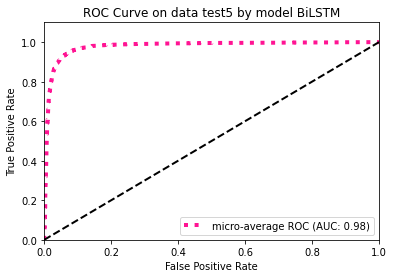

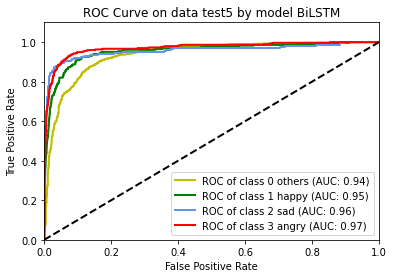

In [53]:
key_name = "test5"
fpr = fprs[key_name]
tpr = tprs[key_name]
roc_auc = roc_aucs[key_name]
dataname=key_name
plot_roc(fpr, tpr, roc_auc, dataname,modelname,choose = "all")
plot_roc(fpr, tpr, roc_auc, dataname,modelname,choose = "macro")
plot_roc(fpr, tpr, roc_auc, dataname,modelname,choose = "micro")
plot_roc(fpr, tpr, roc_auc, dataname,modelname,choose = "label")

## 8.4.Evaluation: P-R Curve, average precision

In [54]:
def compute_p_r_curve(y_test1hot, y_score):
    n_class = 4
    precision = dict()
    recall = dict()
    average_precision =dict()
    
    # compute P-R curve on each label
    for i in range(n_class):
        precision[i],recall[i], _ = precision_recall_curve(y_test1hot[:,i],y_score[:,i])
        average_precision[i] = average_precision_score(y_test1hot[:,i],y_score[:,i])
        
    # compute P-R curve with average = "micro"
    precision["micro"],recall["micro"],_=precision_recall_curve(y_test1hot.ravel(),y_score.ravel())
    average_precision["micro"]=average_precision_score(y_test1hot,y_score,average="micro")
    
    return precision,recall,average_precision

In [55]:
def compute_p_r_curve_all(y_test1hot, y_scores):
    recalls=dict()
    precisions=dict()
    average_precisions=dict()
    for key in y_scores.keys():
        recalls[key],precisions[key],average_precisions[key]=compute_p_r_curve(y_test1hot,y_scores[key])
    
    return recalls,precisions,average_precisions
    

In [56]:
def plot_pr(recall, precision, average_precision, dataname,modelname,choose = "all"):
    n_class=4
    
    # make variable choose as command for choosing which curve to show
    # below it's the explaination of choose
    ex_choose = {
        "all": "show all curves",
        "micro": "only show micro curve",
        "label": "only show curves of labels"
        }
    
    colors = ["y", "g","cornflowerblue","r"]
    label_name = ["others", "happy","sad","angry"]
    plt.figure()
    
    if choose !="label":
        # draw the line of micro-average ROC curve
        plt.plot(recall["micro"],precision["micro"],
                 label="micro-average P-R curve (average precision: {0:0.2f})".format(average_precision["micro"]),
                 color = 'deeppink',linestyle=':',lw=4)
    
        
    if choose !="micro":    
        # draw line of each label
        for i in range(n_class):
            plt.plot(recall[i],precision[i],color=colors[i],lw=2,
                     label="P-R curve of class {0} {1} (average precision: {2:0.2f})"
                     "".format(i,label_name[i],average_precision[i]))
    
    plt.plot([0,1],[1,0],linestyle="--",color='k',lw=2)
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.1])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('P-R Curve on data {0} by model {1}'.format(dataname,modelname))
    
    plt.legend(loc="lower left")
    plt.savefig("Pictures\\{a}\\SingleData\\P-R Curve by model {b}_{c} on data {d}.png".format(a=modelname,d=dataname,b=modelname,c=choose))
    plt.show()
    

In [57]:
recalls,precisions,average_precisions = compute_p_r_curve_all(y_test1hot, y_scores)

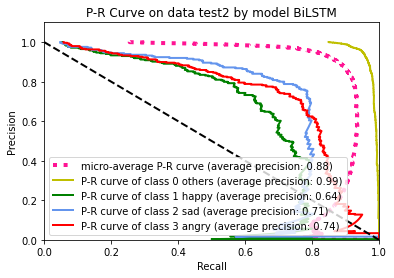

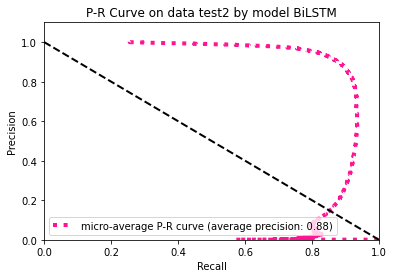

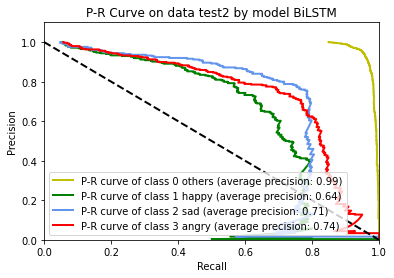

In [58]:
key_name="test2"
recall=recalls[key_name]
precision=precisions[key_name]
average_precision=average_precisions[key_name]
dataname=key_name
plot_pr(recall, precision, average_precision, dataname,modelname,choose = "all")
plot_pr(recall, precision, average_precision, dataname,modelname,choose = "micro")
plot_pr(recall, precision, average_precision, dataname,modelname,choose = "label")

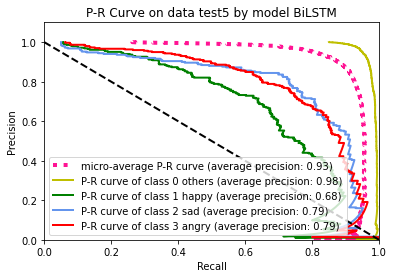

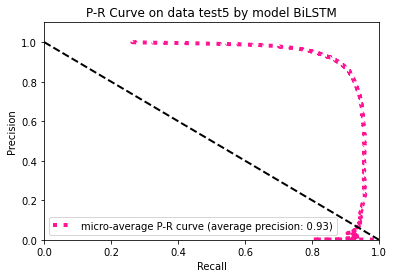

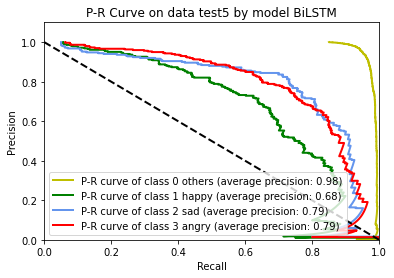

In [59]:
key_name="test5"
recall=recalls[key_name]
precision=precisions[key_name]
average_precision=average_precisions[key_name]
dataname=key_name
plot_pr(recall, precision, average_precision, dataname,modelname,choose = "all")
plot_pr(recall, precision, average_precision, dataname,modelname,choose = "micro")
plot_pr(recall, precision, average_precision, dataname,modelname,choose = "label")